7 Вариант
![title](lab1.png)


Аналитическое решение первого интеграла
![title](integral1.png)
Численное решение
2 + 1/e^3≈2.04978706836786

In [7]:
import math
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from scipy.interpolate import interp1d

from scipy import *
from scipy.integrate import *

%matplotlib inline

In [138]:
#defenition of function given in task
def my_func(x):
    return( 1 - np.exp(-x))
x = [0,1,2]
for i in x:
    print( my_func(i))

0.0
0.6321205588285577
0.8646647167633873


2.042671138420608

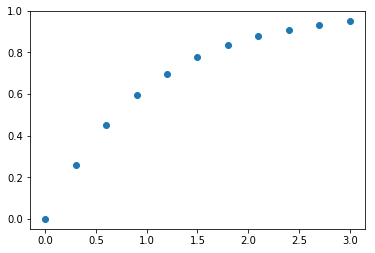

In [70]:
#given in task function graph
min_x = 0
max_x = 3
step = 0.3
i = min_x
valuesX = []
valuesY = []
while(i < max_x):
    valuesX.append(my_func(i))
    valuesY.append(i)
    i += step
plt.plot( valuesY, valuesX, 'o')
np.trapz(valuesX, dx = step)

In [215]:
#Lagrange polynom finction
def lagranz(x,y,t):
    z = 0
    for j in range(len(y)):
        p1 = 1 
        p2 = 1
        for i in range(len(x)):
            if i == j:
                p1 = p1 * 1 
                p2 = p2 * 1   
            else: 
                p1 = p1 * (t - x[i])
                p2 = p2 * (x[j] - x[i])
        z = z + y[j] * p1 / p2
    return z

In [216]:
#data prepearing
nodes = [0.3 * i for i in range(11)]
x = nodes
y = []
for i in range(len(x)):
    y.append(my_func(x[i]))

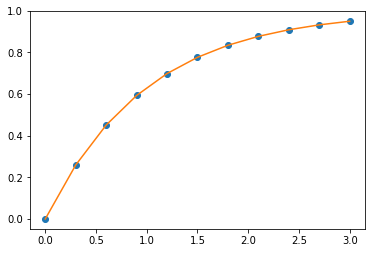

In [217]:
#Graph building
x_lag = np.linspace(np.min(x),np.max(x), 11) # on 10 nodes
y_lag = [lagranz(x, y, i) for i in x_lag]
plt.plot(x,y,'o',x_lag,y_lag)
plt.show()

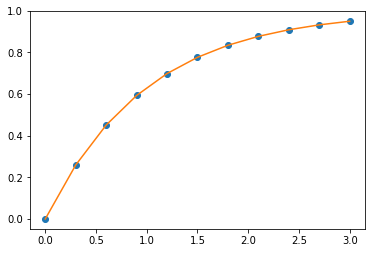

In [223]:
# Splain interpolation
points = zip(x, y)

# Sort list of tuples by x-value
points = sorted(points, key=lambda point: point[0])

# Split list of tuples into two list of x values any y values
x, y = zip(*points)

new_length = 11
x_spline = np.linspace(min(x), max(x), new_length)
y_spline = sp.interpolate.interp1d(x, y, kind='cubic')(x_spline)
plt.plot(x_spline, y_spline, 'o', x_spline, y_spline, )

In [225]:
print(' X    f(x)    lagr(x)    spline(x)')
for i in range(11):
     print('%.1f' % x[i],'%.12f' % my_func(i* 0.3), '%.12f' %y_lag[i], '%.12f' %y_spline[i])
    
    
    
    

 X    f(x)    lagr(x)    spline(x)
0.0 0.000000000000 0.000000000000 0.000000000000
0.3 0.259181779318 0.259181779318 0.259181779318
0.6 0.451188363906 0.451188363906 0.451188363906
0.9 0.593430340259 0.593430340259 0.593430340259
1.2 0.698805788088 0.698805788088 0.698805788088
1.5 0.776869839852 0.776869839852 0.776869839852
1.8 0.834701111778 0.834701111778 0.834701111778
2.1 0.877543571747 0.877543571747 0.877543571747
2.4 0.909282046711 0.909282046711 0.909282046711
2.7 0.932794487260 0.932794487260 0.932794487260
3.0 0.950212931632 0.950212931632 0.950212931632


In [200]:

def NewtonCotes( a, b, Degree, Ndivisions, f):
    koef= [ [ 1,0,0,0,0,0,0,0,0,0],
                        [1,1,0,0,0,0,0,0,0,0],
                        [1,4,1,0,0,0,0,0,0,0],
                        [1,3,3,1,0,0,0,0,0,0],
                        [7,32,12,32,7,0,0,0,0,0],
                        [19,75,50,50,75,19,0,0,0,0],
                        [41,216,27,272,27,216,41,0,0,0],
                        [751,3577,1323,2989,2989,1323,3577,751,0,0],
                        [989,5888,-928,10496,-4540,10496,-928,5888,989,0],
                        [2857,15741,1080,19344,5778,5778,19344,1080,15741,2857],
                        ];
    mltp= [1,1.0/2,1.0/3,3.0/8,2.0/45,5.0/288,1.0/140,7.0/17280,4.0/14175,9.0/89600];
 
    if ((Degree<0) or (Degree>9)):
        print( ' error ')
    if (a>=b) :
        print("Wrong segment")
    if (Ndivisions<1):
        Ndivisions = 1
 
    h=(b-a)/(Degree*Ndivisions);
 
    Sum = 0
    for j in range(0, Ndivisions, 1):
    
        PartSum = 0
        
        for i in range(0, Degree + 1, 1):
            PartSum += koef[Degree][i] * f(a + (i+j*Degree) * h )
            #print(a + (i+j*Degree) * h )
        Sum += mltp[Degree]*PartSum*h;
    
 
    return Sum

NewtonCotes(0, 3, 8, 11, spl)

TypeError: only integer scalar arrays can be converted to a scalar index

In [ ]:
x_lag = np.linspace(np.min(x),np.max(x), 11)

print(' true value : 2.04978706836786')
print(' lagr :' , NewtonCotes(0, 3, 8, 11, my_func) )
print(' spline :', simps(my_func(x_spline), dx = step))
# trapz(sin(x),dx=pi/32)-